In [1]:
library(tidyverse)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Load in datasets
weekly = read.csv('../Results/GAM_weekly.csv', header = T, stringsAsFactors = F)
biweekly = read.csv('../Results/GAM_biweekly.csv', header = T, stringsAsFactors = F)
monthly = read.csv('../Results/GAM_monthly.csv', header = T, stringsAsFactors = F)


In [3]:
cat("There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
cat("There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
cat("There are ", dim(monthly)[1], " rows in the monthly dataframe\n")

There are  161  rows in the weekly dataframe
There are  161  rows in the biweekly dataframe
There are  161  rows in the monthly dataframe


In [4]:
wk_0 = weekly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()
bwk_0 = biweekly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()
mnth_0 = monthly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()

cat("There are ", wk_0, " removeable rows in the weekly dataframe\n")
cat("There are ", bwk_0, " removeable rows in the biweekly dataframe\n")
cat("There are ", mnth_0, " removeable rows in the monthly dataframe\n")

There are  50  removeable rows in the weekly dataframe
There are  42  removeable rows in the biweekly dataframe
There are  32  removeable rows in the monthly dataframe


In [5]:
# Investigate where multivariate models have not converged

cat('\nWeekly\n')
print(summary(weekly$Multi_DevianceExplained))

cat('\nBiweekly\n')
print(summary(biweekly$Multi_DevianceExplained))

cat('\nMonthly\n')
print(summary(monthly$Multi_DevianceExplained))

cat("\n****************************\n NA Datasets \n")

cat('\nWeekly\n')
print(weekly[is.na(weekly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

cat('\nBiweekly\n')
print(biweekly[is.na(biweekly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

cat('\nMonthly\n')
print(monthly[is.na(monthly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

monthly %>% filter(Species == "Aedes.aegypti" & Location == "Saint_Johns")  %>% select(Species, temp_lag0, temp_lag1, temp_lag2, Best_Temp)


Weekly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.50   11.53   24.70   25.19   36.50   98.80       1 

Biweekly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.40   12.10   28.50   31.12   44.40   95.50 

Monthly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   10.00   31.90   33.04   50.70   95.40       2 

****************************
 NA Datasets 

Weekly
               Species Location nr_bestfit_obs z_inflation_pct
32 Anopheles.albimanus  Manatee              0              NA

Biweekly
[1] Species         Location        nr_bestfit_obs  z_inflation_pct
<0 rows> (or 0-length row.names)

Monthly
           Species    Location nr_bestfit_obs z_inflation_pct
48 Culex.territans     Manatee              0              NA
98   Aedes.aegypti Saint_Johns             13              85


Species,temp_lag0,temp_lag1,temp_lag2,Best_Temp
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Aedes.aegypti,-126.9603,-57.98138,-56.77242,temp_lag0


I want to remove models from each temporal scale that did not converge at the multivariate level

In [6]:
remove = c(which(is.na(weekly$Multi_DevianceExplained)), which(is.na(biweekly$Multi_DevianceExplained)), which(is.na(monthly$Multi_DevianceExplained)))

weekly = weekly[-remove,]
biweekly = biweekly[-remove,]
monthly = monthly[-remove,]

str(monthly)

'data.frame':	158 obs. of  31 variables:
 $ Species                  : chr  "Aedes.aegypti" "Aedes.albopictus" "Aedes.infirmatus" "Aedes.sollicitans" ...
 $ temp_lag0                : num  339 212 795 439 1199 ...
 $ temp_lag1                : num  327 200 782 470 1262 ...
 $ temp_lag2                : num  324 221 803 448 1268 ...
 $ precip_lag0              : num  296 187 789 472 1263 ...
 $ precip_lag1              : num  310 209 801 470 1292 ...
 $ precip_lag2              : num  355 242 803 451 1278 ...
 $ nr_total_obs             : int  130 130 130 130 130 130 130 130 130 130 ...
 $ nr_bestfit_obs           : int  126 127 127 126 127 126 127 126 126 126 ...
 $ nr_nonzero_obs           : int  106 103 117 97 125 59 110 124 126 126 ...
 $ p                        : num  0 0 -4 -0.08 -69.41 ...
 $ z_inflation_pct          : int  16 19 8 23 2 53 13 2 0 0 ...
 $ Best_Temp                : chr  "temp_lag2" "temp_lag1" "temp_lag1" "temp_lag0" ...
 $ AIC_wt_temp              : num  82.8 9

In [7]:
# Ensure every aggregation has the same number of datasets
cat("There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
cat("There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
cat("There are ", dim(monthly)[1], " rows in the monthly dataframe\n")

There are  158  rows in the weekly dataframe
There are  158  rows in the biweekly dataframe
There are  158  rows in the monthly dataframe


## Visualize Zero Inflation

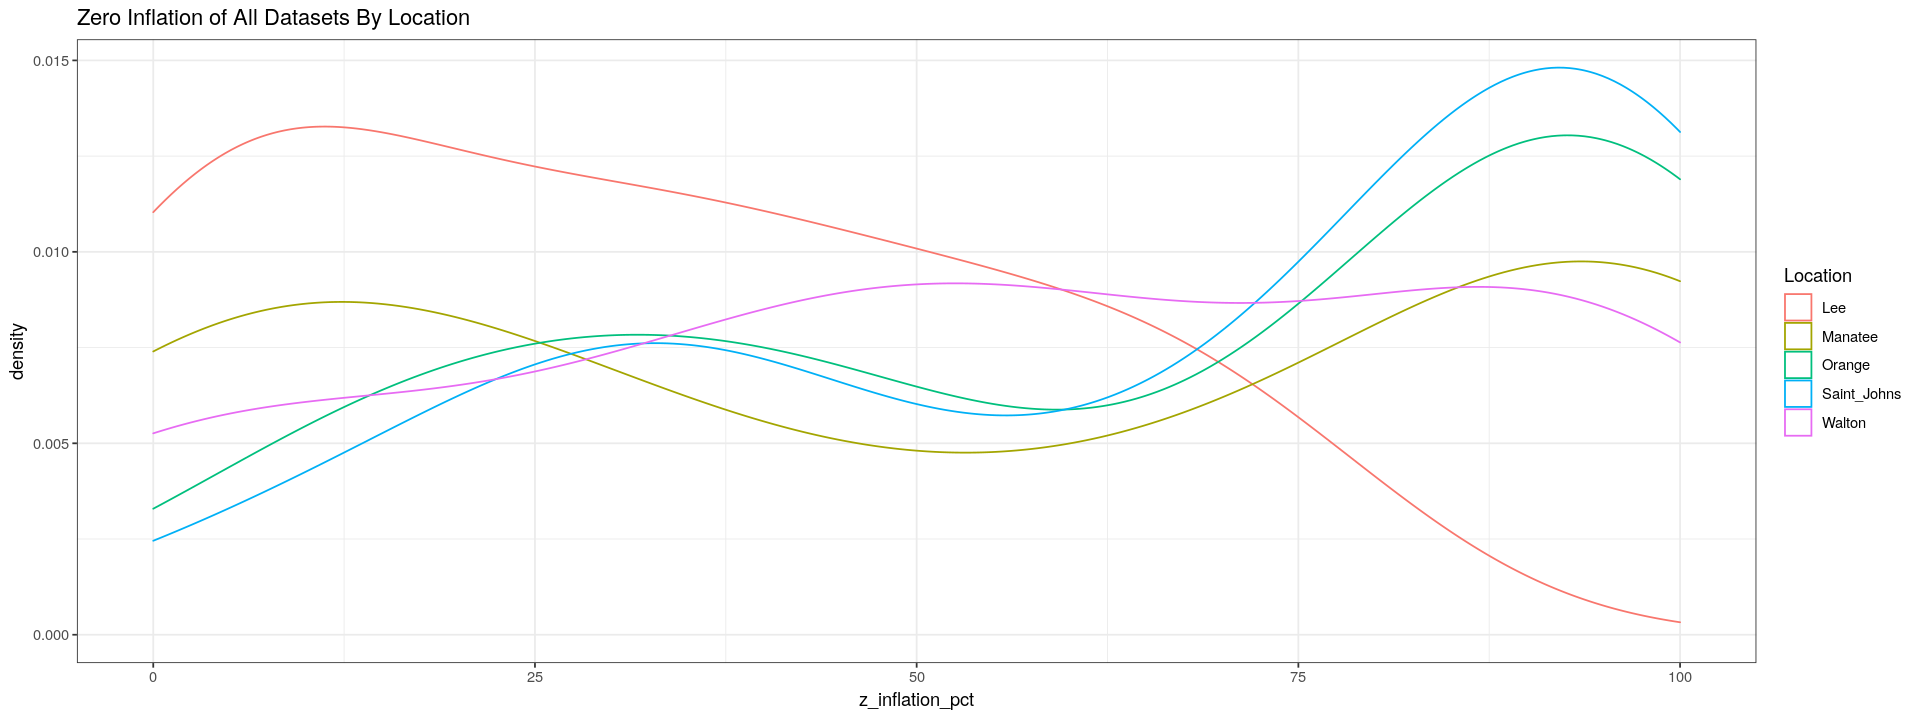

In [8]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly, aes(x = z_inflation_pct, color = Location)) + geom_density(alpha = 0.3) + theme_bw() +
ggtitle("Zero Inflation of All Datasets By Location")


My highly zero inflated models are causing trouble- they have very low deviance explained (understandably!) and tend not to converge for my highest dimensional model (autoregressive multivariate). I do not believe that these models are informative for my analyis- such low abundance is more a sign of presence/absence than actual effect of temperature and precipitation.

Deviance explained of models with greater than 95% zero inflation:

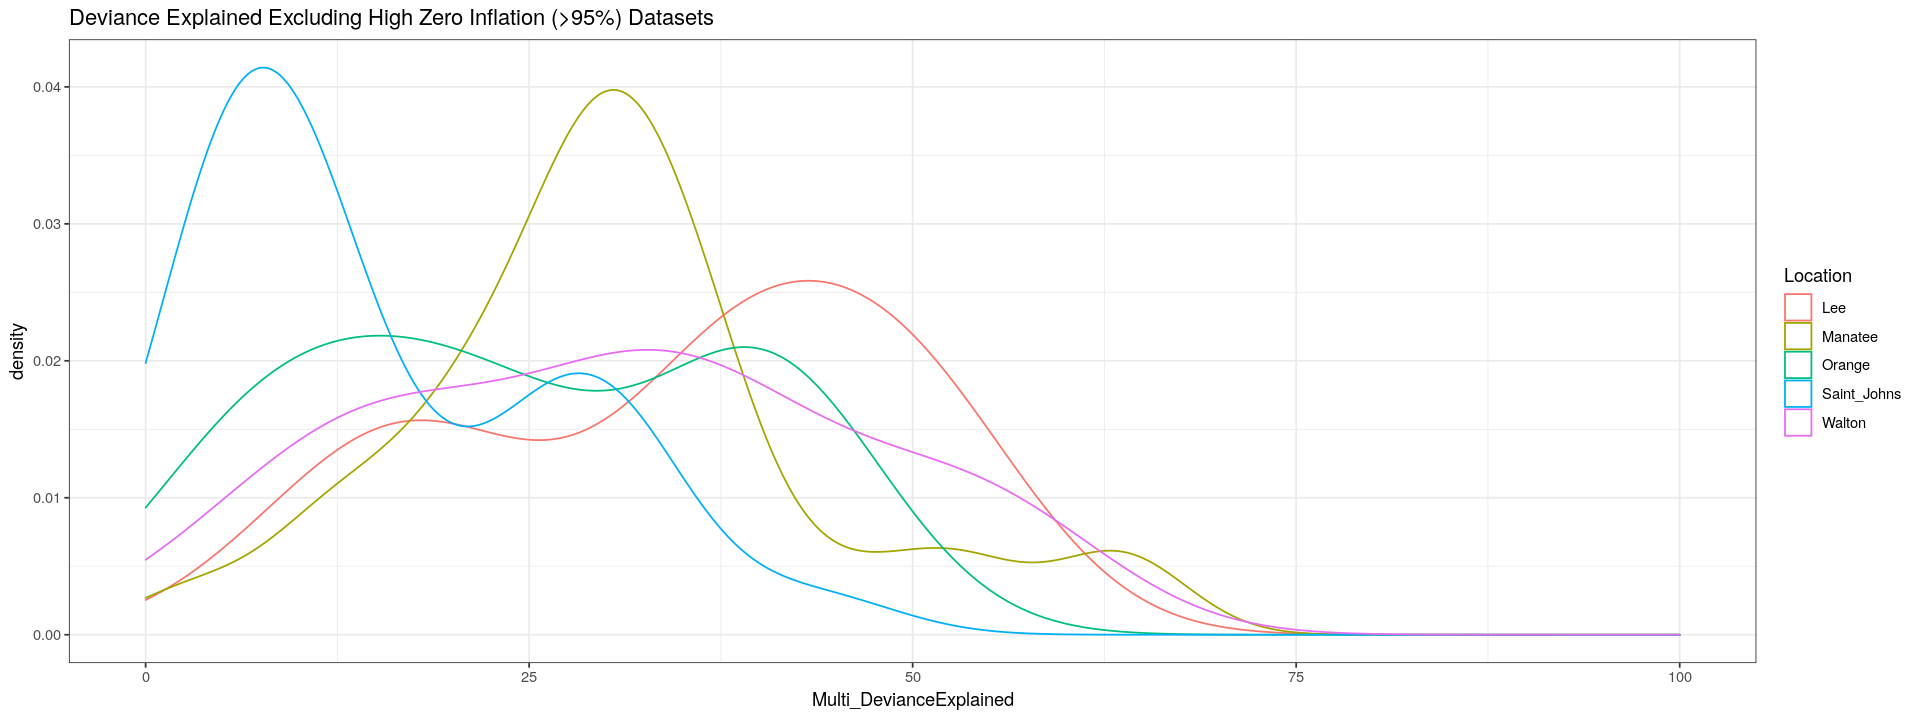

In [9]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly[-which(weekly$z_inflation_pct > 95),], aes(x = Multi_DevianceExplained, color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained Excluding High Zero Inflation (>95%) Datasets")

I want to explore the number of non-zero observations in the best fit datasets by location

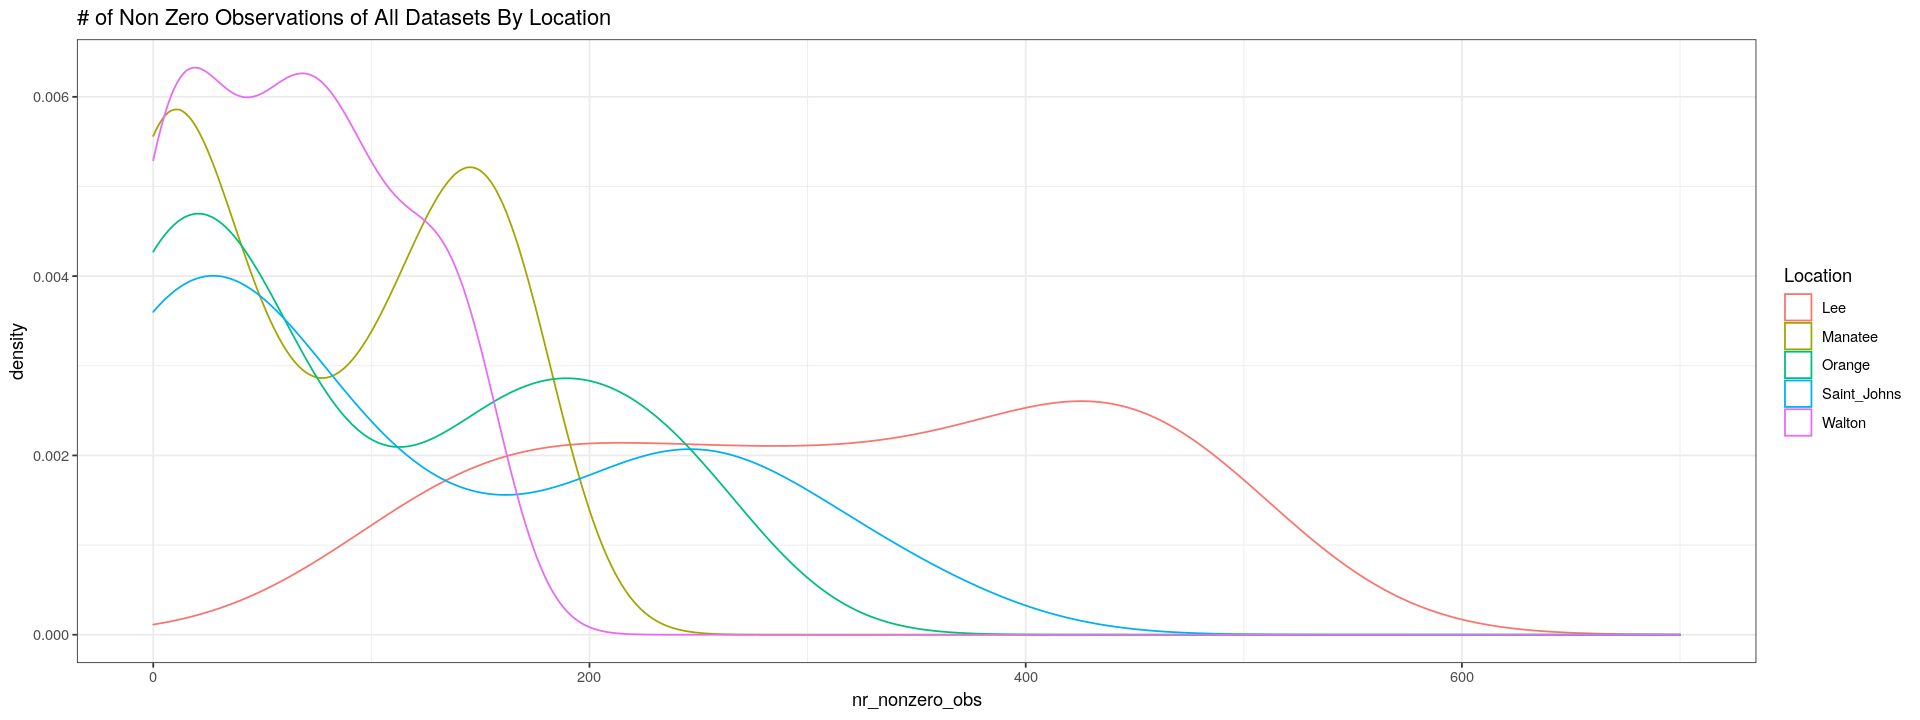

In [10]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly, aes(x = nr_nonzero_obs, color = Location)) + geom_density(alpha = 0.3) + theme_bw() +
ggtitle("# of Non Zero Observations of All Datasets By Location") + xlim(0, 700)

I will remove datasets with over 90% zero inflation:

In [11]:
length(which(monthly$z_inflation_pct <= 90))

[1] 128

In [12]:
remove = unique(c(which(weekly$z_inflation_pct >= 91), which(biweekly$z_inflation_pct >= 91), which(monthly$z_inflation_pct >= 91)))

cat("\n Removing ", length(remove), " datasets from each aggregation \n")

weekly = weekly[-remove,]
biweekly = biweekly[-remove,]
monthly = monthly[-remove,]

# Ensure every aggregation has the same number of datasets
cat("\n There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
cat("\n There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
cat("\n There are ", dim(monthly)[1], " rows in the monthly dataframe\n")




 Removing  47  datasets from each aggregation 

 There are  111  rows in the weekly dataframe

 There are  111  rows in the biweekly dataframe

 There are  111  rows in the monthly dataframe


## Table 1: Deviance explained

Build table comparing output of each temporal scale:

In [13]:
scales = list(weekly, biweekly, monthly)
names = c("weekly", "biweekly", "monthly")

cat("\nScale\tDeviance Explained\n------------------------------\n")
for(i in 1:length(scales)){
    if(names[i] == "weekly"){cat(names[i], "\t\t", median(scales[[i]]$Multi_DevianceExplained), "\n")}
    else{cat(names[i], "\t", median(scales[[i]]$Multi_DevianceExplained), "\n")}
}



Scale	Deviance Explained
------------------------------
weekly 		 28.6 
biweekly 	 33 
monthly 	 37.9 


Visualize the deviance explained in each location:

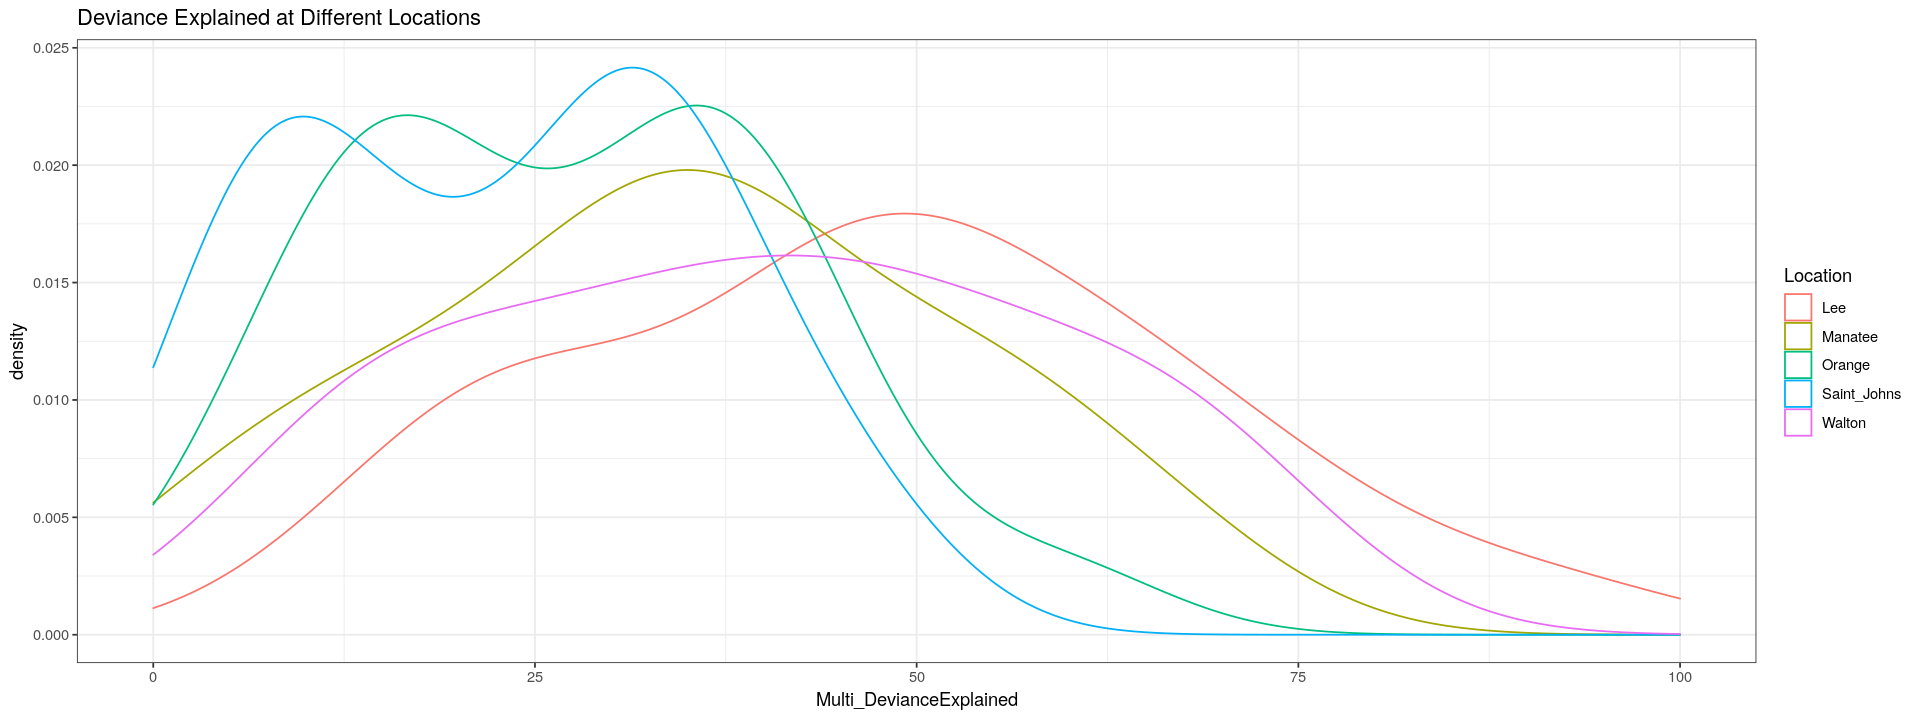

In [14]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = Multi_DevianceExplained, color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained at Different Locations")

Visualize the distribution of MAE at each location:

Warning message:
“Removed 59 rows containing non-finite values (stat_density).”


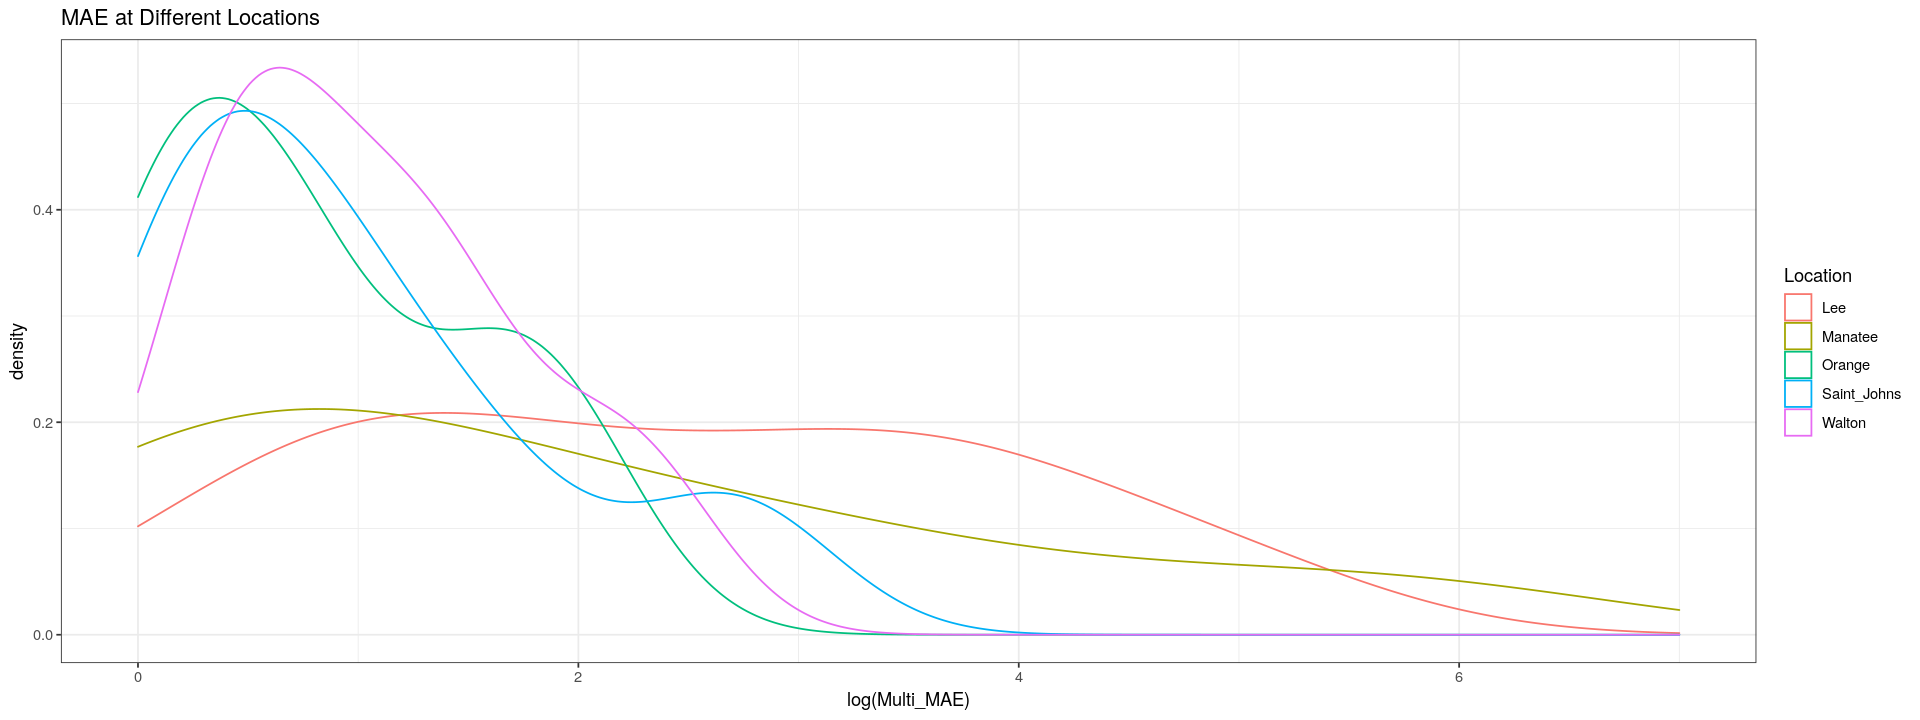

In [15]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = log(Multi_MAE), color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + ggtitle("MAE at Different Locations") + xlim(0,7)

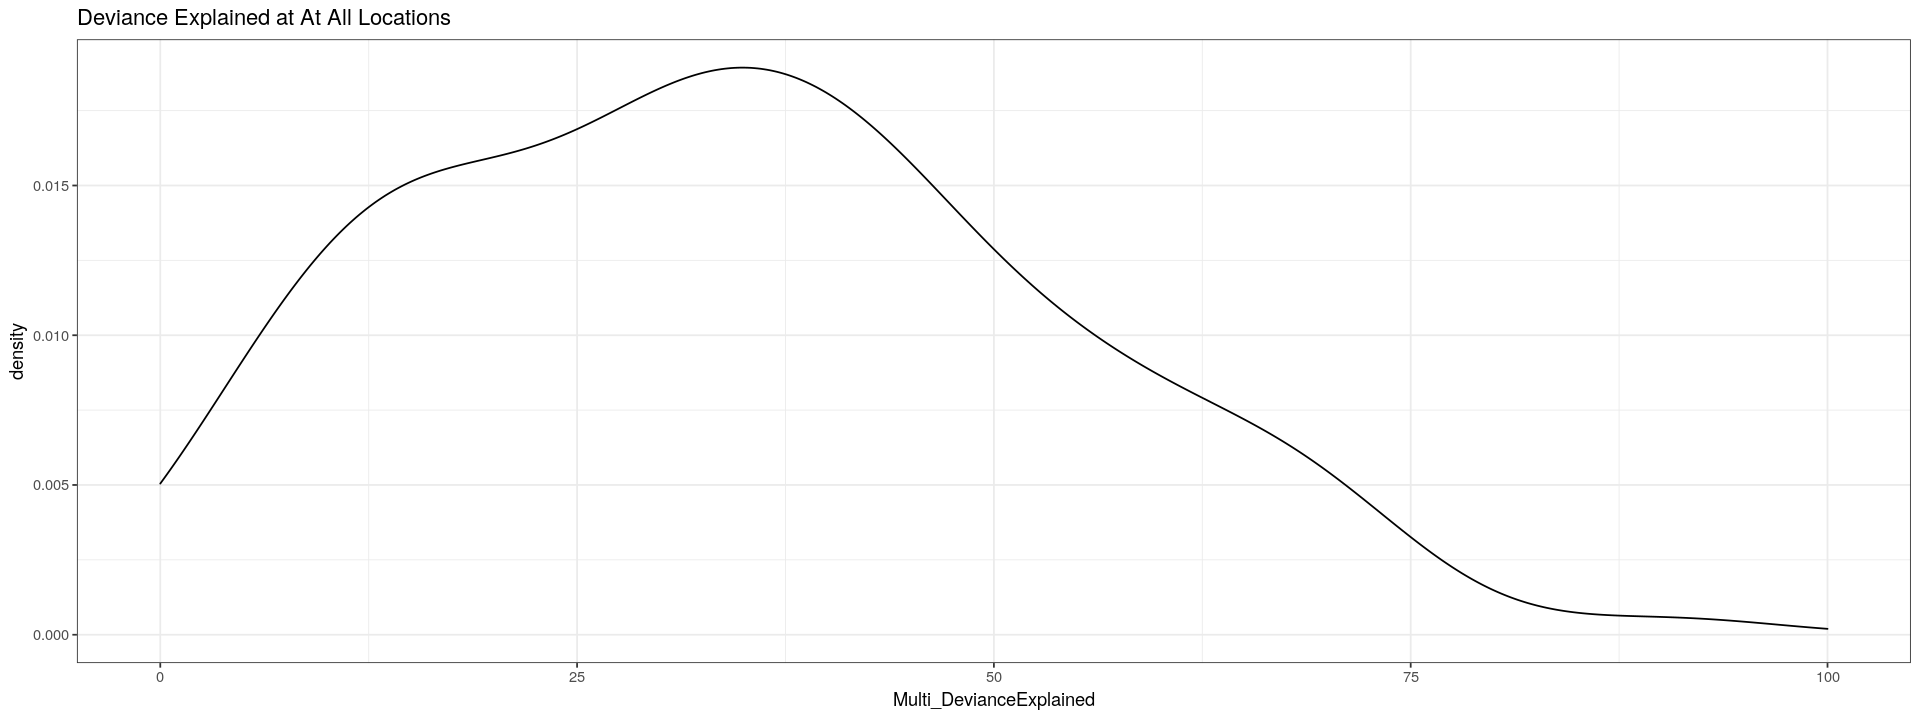

In [16]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = Multi_DevianceExplained)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained at At All Locations")

Create chart to population Table 1 in results: deviance explained at each location and temporal resolution

In [17]:
locations = sort(unique(weekly$Location))

table1 = matrix(NA, ncol = 4, nrow = 6)

for(j in 1:length(locations)){
    table1[j,1] = locations[j]
    table1[j,2] = median(weekly$Multi_DevianceExplained[which(weekly$Location == locations[j])])
    table1[j,3] = median(biweekly$Multi_DevianceExplained[which(biweekly$Location == locations[j])])
    table1[j,4] = median(monthly$Multi_DevianceExplained[which(monthly$Location == locations[j])])                      
}

table1[6,1] = "Total"
table1[6,2] = median(weekly$Multi_DevianceExplained)
table1[6,3] = median(biweekly$Multi_DevianceExplained)
table1[6,4] = median(monthly$Multi_DevianceExplained)


table1 = data.frame(table1)
colnames(table1) = c("Location", "Weekly", "Biweekly", "Monthly")

table2 = matrix(NA, ncol = 4, nrow = 6)

# Do the same table but for MAAPE
for(j in 1:length(locations)){
    table2[j,1] = locations[j]
    table2[j,2] = round(median(weekly$Multi_MAE[which(weekly$Location == locations[j])]),2)
    table2[j,3] = round(median(biweekly$Multi_MAE[which(biweekly$Location == locations[j])]),2)
    table2[j,4] = round(median(monthly$Multi_MAE[which(monthly$Location == locations[j])]),2) 
}

table2[6,1] = "Total"
table2[6,2] = round(median(weekly$Multi_MAE, na.rm = T),2)
table2[6,3] = round(median(biweekly$Multi_MAE, na.rm = T),2)
table2[6,4] = round(median(monthly$Multi_MAE, na.rm = T),2)


table2 = data.frame(table2)
colnames(table2) = c("Location", "Weekly", "Biweekly", "Monthly")


table3 = matrix(NA, ncol = 4, nrow = 6)

# Do the same table but for MAAPE
for(j in 1:length(locations)){
    table3[j,1] = locations[j]
    table3[j,2] = median(weekly$Multi_NMAE[which(weekly$Location == locations[j])])
    table3[j,3] = median(biweekly$Multi_NMAE[which(biweekly$Location == locations[j])])
    table3[j,4] = median(monthly$Multi_NMAE[which(monthly$Location == locations[j])])                      
}

table3[6,1] = "Total"
table3[6,2] = median(weekly$Multi_NMAE, na.rm = T)
table3[6,3] = median(biweekly$Multi_NMAE, na.rm = T)
table3[6,4] = median(monthly$Multi_NMAE, na.rm = T)


table3 = data.frame(table3)
colnames(table3) = c("Location", "Weekly", "Biweekly", "Monthly")

#print(table3)
print(table2)
print(table1)

     Location Weekly Biweekly Monthly
1         Lee    3.6     9.66   11.87
2     Manatee   1.04     0.92     0.9
3      Orange    0.5     0.44    0.43
4 Saint_Johns    0.2      0.2     0.2
5      Walton   0.26     0.22    0.19
6       Total   0.76     0.83    0.78
     Location Weekly Biweekly Monthly
1         Lee   37.7     45.8    52.2
2     Manatee   30.2     35.5    40.1
3      Orange   26.2       29      35
4 Saint_Johns     13     25.9    12.6
5      Walton   31.7     40.2   49.85
6       Total   28.6       33    37.9


Examine number of species in each location:

In [18]:
# Read in a clean version of the monthly dataset
weekly = read.csv('../Results/GAM_weekly.csv', header = T, stringsAsFactors = F)
biweekly = read.csv('../Results/GAM_biweekly.csv', header = T, stringsAsFactors = F)
monthly = read.csv('../Results/GAM_monthly.csv', header = T, stringsAsFactors = F)


# Remove rows with greater than 90% zero inflation:
monthly = monthly %>% filter(z_inflation_pct < 90)
weekly = weekly %>% filter(z_inflation_pct < 90)
biweekly = biweekly %>% filter(z_inflation_pct < 90)


cat("\nLocation\tSpecies\n------------------------------\n")
for(i in 1:length(locations)){
    if(locations[i] %in% c("Saint_Johns", "Manatee")){
        cat(locations[i], "\t", length(which(weekly$Location == locations[i])), "\n")
    }
    else{cat(locations[i], "\t\t", length(which(weekly$Location == locations[i])), "\n")}
}

cat("\n\n There are ", length(unique(weekly$Species)), " unique species overall")


Location	Species
------------------------------
Lee 		 18 
Manatee 	 31 
Orange 		 18 
Saint_Johns 	 21 
Walton 		 22 


 There are  35  unique species overall

In [19]:
compare_specs = which(monthly$Location == "Lee")

counts = data.frame(table(monthly$Species))
colnames(counts) = c("Species", "Counts")

counts = counts[which(counts$Counts > 1),]
cat(nrow(counts), " species with greater than 1 occurance")
table(counts$Counts)

29  species with greater than 1 occurance


 2  3  4  5 
 3  2 13 11 

In order to have some decent comparison, I want to restrict to species that occur in 4 or 5 of my sites. Let's see what these are:

In [20]:
keep_these = sort(counts$Species[which(counts$Counts >4)])
keep_these

[1] A.atlanticus.tormentor.morphological.group
 [2] Aedes.albopictus                          
 [3] Aedes.infirmatus                          
 [4] Aedes.triseriatus                         
 [5] Anopheles.quadrimaculatus                 
 [6] C.pipiens.morphological.group             
 [7] Culex.nigripalpus                         
 [8] Culiseta.melanura                         
 [9] Psorophora.ciliata                        
[10] Psorophora.columbiae                      
[11] Psorophora.ferox                          
38 Levels: A.atlanticus.tormentor.morphological.group ... Wyeomyia.vanduzeei

I have 3 major vector species in this group: Culex nigripalpus, Aedes albopictus, and Anopheles quadrimaculatus.

## Investigate Result 2: Generalizability

In [21]:
# Restrict species to those who have been generalized, as demonstrated by a non-NA reference column
#generalized = monthly[which(!is.na(monthly$Reference)), c("Species", "Location", "Multi_MAE","Multi_MB", "Reference", "Ref_MAE", "Ref_MB", "Ref_MAPE")]
#
# Only keep species that still have 4 or 5 occurances after cleaning
#generalized = generalized %>% filter(Species %in% keep_these)

#generalized$MAE_diff = round(generalized$Ref_MAE - generalized$Multi_MAE, 2)

# Where there's a self-comparison, mark as 999
#generalized$MAE_diff[which(generalized$Location == generalized$Reference)] = 999

#results1 = matrix(NA, nrow = length(unique(generalized$Species)), ncol = 5)

#for(i in 1:length(locations)){
#    for(j in 1:length(keep_these)){
        
#        index = which(generalized$Species == keep_these[j] & generalized$Location == locations[i])
        
#        if(length(index) > 0){
#            results1[j, i] = generalized$MAE_diff[which(generalized$Species == keep_these[j] & generalized$Location == locations[i])]
            
#        }
         
#    }
#}

#results1 = data.frame(keep_these, results1)
#colnames(results1) = c("Species", locations)

#results1


# Create table of significant lags across locations


In [22]:
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "temp")
as.numeric(str_detect(string = monthly$Multi_SignifVariables, "precip"))

# Only keep species that still have 5 occurances after cleaning
manylocs = monthly %>% filter(Species %in% keep_these)

results = matrix(NA, nrow = length(unique(manylocs$Species)), ncol = 7)
results[,6:7] = 0

results[1,6] + as.numeric(str_detect(string = monthly$Multi_SignifVariables[1], "precip"))

[1]  1  1  1  1  0  1  0  0  1  1  0  1  1  1  1  1  0  1  0  1  0  1  0  0  0
 [26]  0  1  1  0  1  0  1  1  1  1  1  0  1  1  1  1  0  1  1  1  1  0  0  0  0
 [51]  0  0  1  0  0  0  1  0  1  1  0  1  1  1  0  0  1  1  0  0  1  0  0  1 NA
 [76]  1  0  0  1  0  1  0  0  1  0  0  0  0  0  1  1  1  1  0  0  1  1  0  1  1
[101]  1  1  1  1  0  0  0  0  0  0  1  0  1  1  0  1  1  1  1  0  0  1  1  0  1
[126]  1  0  1

[1] 1

In [23]:
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "temp")
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "precip")

# Only keep species that still have 4 or 5 occurances after cleaning
manylocs = monthly %>% filter(Species %in% keep_these)

results = matrix(NA, nrow = length(unique(manylocs$Species)), ncol = 7)
results[,6:7] = 0

for(i in 1:length(locations)){
    for(j in 1:length(keep_these)){
        
        index = which(manylocs$Species == keep_these[j] & manylocs$Location == locations[i])
        
        if(length(index) > 0){
            results[j, i] = manylocs$Multi_SignifVariables[which(manylocs$Species == keep_these[j] & manylocs$Location == locations[i])]
            
        }
         
    }
}

results = data.frame(keep_these, results, stringsAsFactors = F)
colnames(results) = c("Species", locations, "Total_Temperature", "Total_Precipitation")


for(i in 1:nrow(results)){
    results[i,7] = sum(as.numeric(str_detect(string = as.character(results[i,2:5]), "temp")), na.rm = T)
    results[i,8] = sum(as.numeric(str_detect(string = as.character(results[i,2:5]), "precip")), na.rm = T)
}

results

Species,Lee,Manatee,Orange,Saint_Johns,Walton,Total_Temperature,Total_Precipitation
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A.atlanticus.tormentor.morphological.group,precip,temp,"temp,precip","temp,precip","temp,precip",3,3
Aedes.albopictus,precip,"temp,precip",temp,precip,"temp,precip",2,3
Aedes.infirmatus,"temp,precip","temp,precip",temp,"temp,precip",,4,3
Aedes.triseriatus,"temp,precip",,temp,temp,temp,3,1
Anopheles.quadrimaculatus,"temp,precip",temp,temp,,,3,1
C.pipiens.morphological.group,temp,temp,temp,"temp,precip",temp,4,1
Culex.nigripalpus,"temp,precip","temp,precip","temp,precip",precip,temp,3,4
Culiseta.melanura,"temp,precip",temp,precip,precip,"temp,precip",2,3
Psorophora.ciliata,"temp,precip",precip,precip,,,1,3


In [24]:
#monthly %>% select(Species, Location, Multi_SignifVariables, Multi_DevianceExplained) %>% filter(str_length(Multi_SignifVariables) > 6)

table(weekly$Best_Precip)
table(biweekly$Best_Precip)
table(monthly$Best_Precip)


 precip_lag0  precip_lag1 precip_lag10 precip_lag11 precip_lag12  precip_lag2 
           9           14            9            9            8           13 
 precip_lag3  precip_lag4  precip_lag5  precip_lag6  precip_lag7  precip_lag8 
          11            7            8            8            5            5 
 precip_lag9 
           4 


precip_lag0 precip_lag1 precip_lag2 precip_lag3 precip_lag4 precip_lag5 
         31          30          21          11          11          14 


precip_lag0 precip_lag1 precip_lag2 
         53          40          35 

In [25]:
table(weekly$Best_Temp)
table(biweekly$Best_Temp)
table(monthly$Best_Temp)


 temp_lag0  temp_lag1 temp_lag10 temp_lag11 temp_lag12  temp_lag2  temp_lag3 
        20          5          7          5         16         12          9 
 temp_lag4  temp_lag5  temp_lag6  temp_lag7  temp_lag8  temp_lag9 
        14          5          4          6          2          5 


temp_lag0 temp_lag1 temp_lag2 temp_lag3 temp_lag4 temp_lag5 
       36        25        14        13        15        15 


temp_lag0 temp_lag1 temp_lag2 
       61        36        31 


 121  out of  128  monthly datasets successfully converged in both AR and non-AR multivariate models
 The highest deviance explained was  78.9

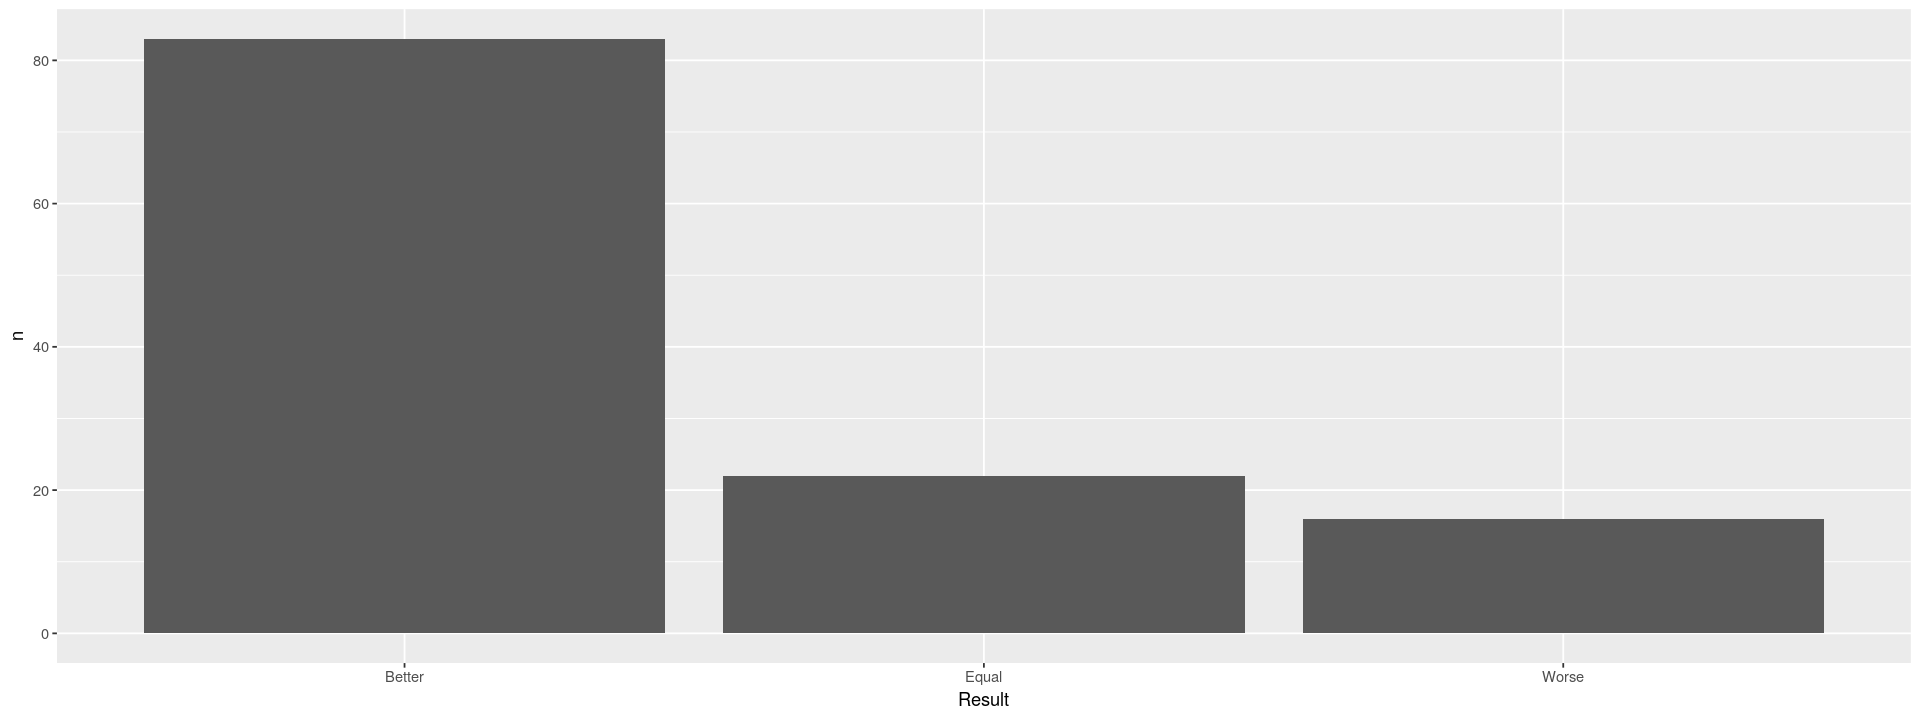

In [26]:
# Find out how many models successfully converged on both multivariate models
success = monthly %>% filter(!is.na(Multi_AIC) & !is.na(MultiAR_AIC))
cat("\n", nrow(success), " out of ", nrow(monthly), " monthly datasets successfully converged in both AR and non-AR multivariate models")

cat("\n", "The highest deviance explained was ", max(monthly$MultiAR_DevianceExplained - monthly$Multi_DevianceExplained, na.rm = T))

# Find out how many datasets were significantly worse, the same, or better with the AR term incorporated
counts = success %>% mutate(AIC_diff = Multi_AIC - MultiAR_AIC) %>% count(AIC_diff > 2, AIC_diff < -2) 

counts = counts %>% add_column(Result = c("Equal", "Worse", "Better"))

ggplot(counts, aes(x = Result, y = n)) + geom_bar(stat = "identity")

In [27]:
# Find the overall MB of models

over = sum(monthly$Multi_MB >0, na.rm = T)
under = sum(monthly$Multi_MB <0, na.rm = T)
zero = sum(monthly$Multi_MB == 0, na.rm = T)

cat("Of ", nrow(monthly), " monthly datasets, ", over, " were overestimated, ", under,
    " were underestimated, ", zero, " were right on the money, and ", 
    sum(is.na(monthly$Multi_MB)), " did not converge")

monthly[which(monthly$Multi_MB == 0),]

Of  128  monthly datasets,  28  were overestimated,  71  were underestimated,  28  were right on the money, and  1  did not converge

,Species,temp_lag0,temp_lag1,temp_lag2,precip_lag0,precip_lag1,precip_lag2,nr_total_obs,nr_bestfit_obs,nr_nonzero_obs,⋯,Multi_SignifVariables,MultiAR_DevianceExplained,MultiAR_AIC,MultiAR_MAE,MultiAR_NMAE,MultiAR_MB,MultiAR_Folds,MultiAR_SignifVariables,Location,sigtemp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<lgl>
21,Aedes.fulvus,-13.816727,-13.1672122,-13.329025,-15.6794717,-16.143505,-14.224273,48,42,21,⋯,,36.7,-24.16671,0.124,Inf,0,10,AR1,Manatee,FALSE
36,Culiseta.inornata,-37.527014,-37.1866704,-36.458298,-37.3160101,-37.283463,-42.849004,48,42,24,⋯,precip,24.2,-40.66073,0.106,2.126,0,10,,Manatee,TRUE
37,Culiseta.melanura,53.204947,56.8021845,62.649831,59.1725012,56.382219,59.903130,48,42,37,⋯,temp,48.9,41.45374,0.412,1.391,0,10,"temp,AR1",Manatee,FALSE
44,Psorophora.howardii,-61.425821,-56.1699015,-54.197986,-66.8072904,-57.886119,-62.125575,48,42,28,⋯,precip,56.0,-73.35369,0.075,2.172,0,10,,Manatee,TRUE
47,Wyeomyia.mitchellii,-146.109017,-144.6772941,-144.093051,-145.7005535,-145.005331,-148.057553,48,42,24,⋯,,32.7,-152.34904,0.021,10.075,0,10,,Manatee,FALSE
48,Wyeomyia.vanduzeei,-230.199948,-231.8819835,-230.578058,-229.6876650,-230.984128,-229.426636,48,42,22,⋯,,39.0,-241.09714,0.011,8.956,0,10,AR1,Manatee,FALSE
53,Aedes.fulvus,-449.818466,-448.0628872,-440.557662,-452.8508465,-447.239791,-438.593419,70,69,9,⋯,precip,15.2,-450.85378,0.004,Inf,0,10,,Orange,TRUE
63,Culex.pilosus,-342.569522,-341.3363714,-334.228332,-344.5448580,-343.357699,-334.075048,70,69,8,⋯,precip,NA,NA,NA,NA,NA,NA,NA,Orange,TRUE
70,Psorophora.howardii,-130.973180,-130.9732960,-127.035940,-129.2358086,-129.609699,-126.031493,70,69,20,⋯,,5.4,-127.64329,0.045,Inf,0,10,,Orange,FALSE


In [28]:
# Find temperature ranges

ranges = vector("list", 5)
names(ranges) = locations

for(i in 1:length(locations)){
    weekly_ts = read.csv(paste0("../Data/Extracted_Data/Aggregated/", locations[i], "_weekly.csv"), header = T, stringsAsFactors = F)
    ranges[[i]] = c(range(weekly_ts$temp_mean), diff(range(weekly_ts$temp_mean)))
}

print(ranges)

$Lee
[1] 14.28816 34.91221 20.62405

$Manatee
[1] 18.38263 34.37219 15.98956

$Orange
[1] 17.98406 35.32719 17.34313

$Saint_Johns
[1]  8.466605 35.805016 27.338412

$Walton
[1] 11.48445 35.57372 24.08926



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-69.410  -0.200  -0.010  -2.082   0.000   0.940       1 